Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import random
from collections import deque, Counter
import math
import matplotlib.pyplot as plt

Making the maze and the agents

In [ ]:
class Maze:
  def __init__(self, size, ghosts_count):
    self.size = size  #maze size
    self.ghosts_count = ghosts_count
    self.maze = self.create_maze()
    self.ghosts = self.create_ghosts(self.ghosts_count)

  def check_startGoal(self, maze): #To check whether the start node and the goal node is not blocked
    if maze[0][0] == 0 and maze[self.size-1][self.size-1] == 0:
      return True
    else:
      return False

  def create_maze(self): #To create maze with blocked and unblocked nodes
    maze = np.zeros([self.size,self.size], int)    
    for r in range(self.size):
      for c in range(self.size):
        prob = random.random()
        if prob < 0.28:
          maze[r][c] = 1    
    if not self.check_startGoal(maze):
      maze = self.create_maze()
    return maze

  def is_node_safe(self, row, col): #checks whether the node contains ghost
    if (row,col) in self.ghosts:
        return False
    else:
      return True
  
  def is_node_unblocked(self, row, col): #To check if the node is unblocked
    if self.maze[row][col] == 0:
      return True
    else:
      return False

  def node_exists(self, row, col): #To check if the node exists within the maze
    if (row >= 0 and row < self.size) and (col >= 0 and col < self.size):
      return True
    else:
      return False

  def create_ghosts(self, count): #Creates ghosts in the maze
    ghosts = []
    i = 0
    while i < count:
      row = random.randrange(0, self.size -1) #randomy chooses row and column to place the ghosts
      col = random.randint(0, self.size -1)
      if self.dfs(0, 0, row, col): #checks whether there exists a path to the ghost from the start node using depth first search algorithm
        ghosts.append((row, col))
        i += 1
      else:
        continue
    return ghosts
  
  def futureGhost_statesProbabilities(self, ghosts): #Calculates probabilities of the ghosts occuring in the adjacent nodes to the ghosts
    futureGhost_states = {}
    for ghost in ghosts:
      row, col = ghost[0], ghost[1]
      adj_nodes = []
      #find adj nodes
      row_ops = [-1, 0 , 1, 0]
      col_ops = [0,1, 0, -1]
      for i in range(4):
        if self.node_exists(row + row_ops[i], col+ col_ops[i]):
          adj_nodes.append((row + row_ops[i], col+ col_ops[i]))
      for node in adj_nodes:
        if self.is_node_unblocked(node[0], node[1]):
          if node in futureGhost_states:
            futureGhost_states[node] = futureGhost_states[node] + 1/len(adj_nodes)
          else:
            futureGhost_states[node] = 1/len(adj_nodes)
        else:
          if node in futureGhost_states:
            futureGhost_states[node] = futureGhost_states[node] + 1/(2*len(adj_nodes))
          else:
            futureGhost_states[node] = 1/(2*len(adj_nodes))
          if (row, col) in futureGhost_states:
            futureGhost_states[(row, col)] = futureGhost_states[(row, col)] + 1/(2*len(adj_nodes))
          else:
            futureGhost_states[(row, col)] = 1/(2*len(adj_nodes))
    return futureGhost_states

  def futureGhost_statesProbabilities2(self, futureGhost_states1): #Calculates the probabilities of the ghosts occuring two times into the future
    futureGhost_states2 = {}
    ghosts_copy = self.ghosts
    for ghost in futureGhost_states1:
      row, col = ghost[0], ghost[1]
      adj_nodes = []
      #find adj nodes
      row_ops = [-1, 0 , 1, 0]
      col_ops = [0,1, 0, -1]
      for i in range(4):
        if self.node_exists(row + row_ops[i], col+ col_ops[i]):
          adj_nodes.append((row + row_ops[i], col+ col_ops[i]))
      for node in adj_nodes:
        if self.is_node_unblocked(node[0], node[1]):
          if node in futureGhost_states2:
            futureGhost_states2[node] = 1/2*(futureGhost_states2[node] + 1/len(adj_nodes))
          else:
            futureGhost_states2[node] = 1/2*(1/len(adj_nodes))
        else:
          if node in futureGhost_states2:
            futureGhost_states2[node] = 1/2*(futureGhost_states2[node] + 1/(2*len(adj_nodes)))
          else:
            futureGhost_states2[node] = 1/2*(1/(2*len(adj_nodes)))
          if (row, col) in futureGhost_states2:
            futureGhost_states2[(row, col)] = 1/2*(futureGhost_states2[(row, col)] + 1/(2*len(adj_nodes)))
          else:
            futureGhost_states2[(row, col)] = 1/2*(1/(2*len(adj_nodes)))
    return futureGhost_states2

  def futureGhost_statesProbabilities3(self, futureGhost_states2): #Calculates the probabilities of the ghosts occuring three times into the future
    futureGhost_states3 = {}
    ghosts_copy = self.ghosts
    for ghost in futureGhost_states2:
      row, col = ghost[0], ghost[1]
      adj_nodes = []
      #find adj nodes
      row_ops = [-1, 0 , 1, 0]
      col_ops = [0,1, 0, -1]
      for i in range(4):
        if self.node_exists(row + row_ops[i], col+ col_ops[i]):
          adj_nodes.append((row + row_ops[i], col+ col_ops[i]))
      for node in adj_nodes:
        if self.is_node_unblocked(node[0], node[1]):
          if node in futureGhost_states3:
            futureGhost_states3[node] = 1/4*(futureGhost_states3[node] + 1/len(adj_nodes))
          else:
            futureGhost_states3[node] = 1/4*(1/len(adj_nodes))
        else:
          if node in futureGhost_states3:
            futureGhost_states3[node] = 1/4*(futureGhost_states3[node] + 1/(2*len(adj_nodes)))
          else:
            futureGhost_states3[node] = 1/4*(1/(2*len(adj_nodes)))
          if (row, col) in futureGhost_states3:
            futureGhost_states3[(row, col)] = 1/4*(futureGhost_states3[(row, col)] + 1/(2*len(adj_nodes)))
          else:
            futureGhost_states3[(row, col)] = 1/4*(1/(2*len(adj_nodes)))
    return futureGhost_states3

  def futureGhost_statesProbabilities4(self, futureGhost_states3): #Calculates the probabilities of the ghosts occuring four times into the future
    futureGhost_states4 = {}
    ghosts_copy = self.ghosts
    for ghost in futureGhost_states3:
      row, col = ghost[0], ghost[1]
      adj_nodes = []
      #find adj nodes
      row_ops = [-1, 0 , 1, 0]
      col_ops = [0,1, 0, -1]
      for i in range(4):
        if self.node_exists(row + row_ops[i], col+ col_ops[i]):
          adj_nodes.append((row + row_ops[i], col+ col_ops[i]))
      for node in adj_nodes:
        if self.is_node_unblocked(node[0], node[1]):
          if node in futureGhost_states4:
            futureGhost_states4[node] = 1/8*(futureGhost_states4[node] + 1/len(adj_nodes))
          else:
            futureGhost_states4[node] = 1/8*(1/len(adj_nodes))
        else:
          if node in futureGhost_states4:
            futureGhost_states4[node] = 1/8*(futureGhost_states4[node] + 1/(2*len(adj_nodes)))
          else:
            futureGhost_states4[node] = 1/8*(1/(2*len(adj_nodes)))
          if (row, col) in futureGhost_states4:
            futureGhost_states4[(row, col)] = 1/8*(futureGhost_states4[(row, col)] + 1/(2*len(adj_nodes)))
          else:
            futureGhost_states4[(row, col)] = 1/8*(1/(2*len(adj_nodes)))
    return futureGhost_states4
  
  def futureGhost_states(self, ghosts): # Finding the adjacent nodes of the current ghost position
    futureGhost_states = []
    for ghost in ghosts:
      ghost_neighbours = {}
      row, col = ghost[0], ghost[1]
      adj_nodes = []
      #find adj nodes
      row_ops, col_ops = [-1, 0 , 1, 0], [0,1, 0, -1]
      for i in range(4):
        if self.node_exists(row + row_ops[i], col+ col_ops[i]):
          futureGhost_states.append((row + row_ops[i], col+ col_ops[i]))
      futureGhost_states.append(ghost)
    return futureGhost_states

  
  def move_ghosts(self): # Move the ghosts in the maze using probability 
    for j in range(len(self.ghosts)):
      row, col = self.ghosts[j][0], self.ghosts[j][1]
      adj_nodes = []
      #find adj nodes
      row_ops, col_ops = [-1, 0 , 1, 0], [0,1, 0, -1]
      for i in range(4):
          if self.node_exists(row + row_ops[i], col+ col_ops[i]):
            adj_nodes.append((row + row_ops[i], col+ col_ops[i]))
      probability = 1/len(adj_nodes)
      ghost_choice = adj_nodes[int(math.floor(random.random()/probability))]
      if self.is_node_unblocked(ghost_choice[0], ghost_choice[1]):
        #move the ghost
        self.ghosts[j] = (ghost_choice[0], ghost_choice[1])
      else:
        if random.random() < 0.5:
          self.ghosts[j] = (ghost_choice[0], ghost_choice[1])
        else:
          self.ghosts[j] = (row, col)

  def dfs(self, row, col, goalRow, goalCol): # Depth first search algorithm to check if there exists a path in the maze for it to be valid
    stack=[]
    stack.append([row, col])
    parent ={ }  #to store the parent-node relationship
    visited= set()
    start = (row, col)
    end = (goalRow, goalCol)
    while len(stack) > 0:
      current = stack[len(stack) - 1]
      stack.remove(stack[len(stack)-1])
      cur_row, cur_col = current[0], current[1]
      visited.add((cur_row, cur_col))
      if cur_row == goalRow and cur_col == goalCol:
        path = self.backtrace(parent, start, end)
        return True, path
      #find adj nodes
      row_ops, col_ops = [-1, 0 , 1, 0], [0, 1, 0, -1]
      for i in range(4):
          if self.node_exists(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_unblocked(cur_row + row_ops[i], cur_col+ col_ops[i]):
            if ((cur_row + row_ops[i], cur_col+ col_ops[i])) in visited:
              continue
            else:
              stack.append([cur_row + row_ops[i], cur_col+ col_ops[i]])
              parent[(cur_row + row_ops[i], cur_col+ col_ops[i])] = (cur_row, cur_col)
              visited.add((cur_row + row_ops[i], cur_col+ col_ops[i]))
    return False
  
  def backtrace(self, parent, start, end): # To backtrace the path found
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    return path
  
  def findDistance_euclidean(self, node1, node2): # Finds euclidean distance between two nodes
    distance = math.sqrt((node2[0] - node1[0])**2 + (node2[1] -node1[1])**2)
    return distance

  def findDistance_manhattan(self, node1, node2): # Finds manhattan distance between two nodes
    distance = abs(node2[0]- node1[0]) + abs(node2[1] -node1[1])
    return distance

  def ghost_inWall(self): # Neglecting the ghosts which are in the walls
    modified_ghostVisibility = []
    for ghost in self.ghosts.copy():
      if self.is_node_unblocked(ghost[0], ghost[1]): # If the ghost is not in the wall then append
        modified_ghostVisibility.append(ghost)
    return modified_ghostVisibility

  def heuristic(self, node, ghosts): # Heuristics for agent4 which take into account the ghost probabilities(4 times into the future) and manhattan distance to the goal node.
    weight = 10 # assigning weight to the ghost probabilities
    dist = self.findDistance_manhattan(node, (self.size-1, self.size-1))
    ghost_probabilities1 = self.futureGhost_statesProbabilities(ghosts)
    ghost_probabilities2 = self.futureGhost_statesProbabilities2(ghost_probabilities1)
    ghost_probabilities3 = self.futureGhost_statesProbabilities3(ghost_probabilities2)
    ghost_probabilities4 = self.futureGhost_statesProbabilities4(ghost_probabilities3)
    if node in ghost_probabilities1:
      ghost_probability = ghost_probabilities1[node]
    else:
      ghost_probability = 0
    if node in ghost_probabilities2:
      ghost_probability = ghost_probability + ghost_probabilities2[node]
    if node in ghost_probabilities3:
      ghost_probability = ghost_probability + ghost_probabilities3[node]
    if node in ghost_probabilities4:
      ghost_probability = ghost_probability + ghost_probabilities4[node]
    h = dist + weight * ghost_probability
    return h


  def agent_one(self, row, col, goalRow, goalCol, ghostMove_flag, ghostConsider_flag): #Agent 1 uses BFS to find the shortest path to the goal node.
    start = (row, col)
    end = (goalRow, goalCol)
    parent = {}  #to store the parent-node relationship
    path = []
    queue = deque()
    queue.append((row, col))
    visited= set()
    visited.add((row, col))
    while len(queue) > 0:
      current = queue.popleft()
      cur_row, cur_col  = current[0], current[1]
      if not self.is_node_safe(cur_row, cur_col): #checking if the agent and ghost are in the same cell, then returning false 
        nodeOf_death = (cur_row, cur_col)
        path = self.backtrace(parent, start, nodeOf_death)
        return False, path
      if ghostMove_flag == 1: # Moving the ghosts after each step for agent1 but not moving the ghosts when called by agent2
        self.move_ghosts()
      if cur_row == goalRow and cur_col == goalCol: # Checking if reached the goal node
        path = self.backtrace(parent, start, end) #backtracking the path found with bfs
        return True, path
      #find adj nodes
      row_ops, col_ops = [-1, 0 , 1, 0], [0,1, 0, -1] 
      for i in range(4):
          if self.node_exists(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_unblocked(cur_row + row_ops[i], cur_col+ col_ops[i]):
            if ((cur_row + row_ops[i], cur_col+ col_ops[i])) in visited:
              continue
            else:
              if ghostConsider_flag == 1: 
                #if this function is being called by agent 2, we will consider the position of ghosts to finalise adjacent ghosts
                if self.is_node_safe(cur_row + row_ops[i], cur_col+ col_ops[i]):
                  parent[(cur_row + row_ops[i], cur_col+ col_ops[i])] = (cur_row, cur_col)
                  queue.append((cur_row + row_ops[i], cur_col+ col_ops[i]))
                  visited.add((cur_row + row_ops[i], cur_col+ col_ops[i]))
                else:
                  continue
              else:
                #if its actually agent 1 in maze, he will always choose the shortest path regardless of ghosts
                parent[(cur_row + row_ops[i], cur_col+ col_ops[i])] = (cur_row, cur_col)
                queue.append((cur_row + row_ops[i], cur_col+ col_ops[i]))
                visited.add((cur_row + row_ops[i], cur_col+ col_ops[i]))
    return False, path

  def agent_two(self, row, col, goalRow, goalCol): # Agent two calls agent one at each step
    next= 1
    path= [(row, col)]
    random_move = []
    path_change= False
    initial_status, temp_path = self.agent_one(row, col, goalRow, goalCol, 0, 0) #Calling the agent1 initially to store the shortest path from start node to goal node
    if initial_status == False and (((0,1) in self.ghosts and not self.is_node_unblocked(1,0)) or ((1,0) in self.ghosts and not self.is_node_unblocked(0,1))):
      #If there is no path from start node i.e. either of the adjacent cell is blocked or either of the adjacent cell contains ghost, then the agent two dies
      return False, []
    nex = 1
    while path[-1] != (goalRow, goalCol): #checks if we have reached the goal node
      cur_row, cur_col = path[-1][0], path[-1][1]
      if not self.is_node_safe(cur_row, cur_col): #checks if the ghost in the current node then agent two dies
        return False, []
      if temp_path != []:
        original_path = temp_path

      if nex > len(temp_path)-1:
        #checking if the current path does not have any node left for agent 2 to go, then we change replan
        path_change = True
      else:
        #we find the future ghost states for the next node, and if the node is closer to the ghost we replan the path otherwise append the  next node
        next_node = temp_path[nex]
        if not self.is_node_safe(next_node[0],next_node[1]):
          path_change = True
        else:
          nex += 1
          path_change = False
          path.append(next_node)
          self.move_ghosts()
          continue

      if path_change==True:
        #call the agent one again to replan the path from current node
        status, temp_path = self.agent_one(cur_row, cur_col, goalRow, goalCol, 0, 1)
        if status: # if status is true, we append the node to the path
          nex=1
          path.append(temp_path[1])
          self.move_ghosts()
        else:
          next += 1
          if next >= len(original_path):
            # no new path found, original path exhausted, so we find the adj nodes and randomly append an adjacent node to the path
            #find adj nodes
            row_ops, col_ops = [-1, 0 , 1, 0], [0,1, 0, -1]
            for i in range(4):
                if self.node_exists(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_unblocked(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_safe(cur_row + row_ops[i], cur_col+ col_ops[i]):
                  random_move.append((cur_row + row_ops[i], cur_col+ col_ops[i]))
            if random_move == []:
              return False, []
            move = random.randrange(0, len(random_move))
            path.append(random_move[move]) 
            self.move_ghosts()
            continue  
          path.append(original_path[next])
          self.move_ghosts()
    return True, path
  
  def agent_three(self, row, col, goalRow, goalCol): #call agent two for each adjacent node of agent three
    goalNode = (goalRow, goalCol)
    simulations = 5 #for each adjacent node, call agent two 5 times
    original_ghosts = self.ghosts.copy()
    path = [(row, col)]
    while path[-1] != (goalRow, goalCol): #checks if we have reached the goal node
      max_survivability=0
      optimal_next_node = ()
      next_nodes = {}
      cur_row, cur_col = path[-1][0], path[-1][1]
      cur_node = (cur_row, cur_col)
      adjacent_nodes_onlyone = []
      #checking for the wiggle situation
      counter = 0 #threshold decided -> 2
      if len(path) >= 7:
        for m in range(len(path)-1, len(path)-4, -2):
          if path[m] == path[m-2] and path[m-1] == path[m-3]:
            counter += 1
          if counter >= 2:
            #if wiggle spotted 2 times then go to the sub-optimal node
            if len(sorted_next_nodes) < 2:
              path.append(cur_node)
              for l in range(len(original_ghosts)):
                self.ghosts[l] = original_ghosts[l]
              self.move_ghosts()
              original_ghosts = self.ghosts.copy()
            else:
              path.append(list(sorted_next_nodes)[1])
            break
      if not self.is_node_safe(cur_row, cur_col):
        return False, []
      #find adj nodes of the current cell
      adj_nodes = []
      row_ops, col_ops = [-1, 0 , 1, 0], [0,1, 0, -1]
      for i in range(4):
        if len(path) >= 2:
          if self.node_exists(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_unblocked(cur_row + row_ops[i], cur_col+ col_ops[i]):
            if (cur_row + row_ops[i], cur_col+ col_ops[i]) != path[-2]:
              adj_nodes.append((cur_row + row_ops[i], cur_col+ col_ops[i]))
            adjacent_nodes_onlyone.append((cur_row + row_ops[i], cur_col+ col_ops[i]))
        else:
          if self.node_exists(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_unblocked(cur_row + row_ops[i], cur_col+ col_ops[i]):
            adj_nodes.append((cur_row + row_ops[i], cur_col+ col_ops[i]))
          adjacent_nodes_onlyone.append((cur_row + row_ops[i], cur_col+ col_ops[i]))
          
      if len(adj_nodes)==0:
        optimal_next_node=adjacent_nodes_onlyone[0]
      else:
        for node in adj_nodes:
          survivability = 0
          #here we simulate for 5 times for each adjacent node to find the most optimal node whose survivability is highest
          for k in range(simulations):
            agent2_survived, temp_path = self.agent_two(node[0], node[1], goalRow, goalCol)
            if agent2_survived:
              survivability += 1
            next_nodes[node] = survivability
          if survivability>max_survivability:
            max_survivability = survivability
            # optimal_next_node = node
        sorted_next_nodes = {k: v for k, v in sorted(next_nodes.items(), key=lambda item: item[1], reverse = True)}  
        max_dist = 100000
        for next_node in sorted_next_nodes:
          if sorted_next_nodes[next_node] == max_survivability:
            # optimal_next_nodes.append(next_node)
            distance = self.findDistance_euclidean(next_node, goalNode)
            if distance < max_dist:
              max_dist = distance
              optimal_next_node = next_node
      
      futureGhost_states = self.futureGhost_states(self.ghosts.copy())
      while optimal_next_node in futureGhost_states:
        path.append(cur_node)
        for n in range(len(original_ghosts)):
          self.ghosts[n] = original_ghosts[n]
        self.move_ghosts()
        original_ghosts = self.ghosts.copy()
        futureGhost_states = self.futureGhost_states(self.ghosts.copy())
      path.append(optimal_next_node)
      for j in range(len(original_ghosts)):
        self.ghosts[j] = original_ghosts[j]
      self.move_ghosts()
      original_ghosts = self.ghosts.copy()
    return True, path
  
  def agent_four(self, row, col, goalRow, goalCol):
    path = []
    #Adding start node
    path.append((row, col))
    path_exists, temp_path = self.agent_one(row, col, goalRow, goalCol, 0, 1)
    while path[-1] != (goalRow, goalCol):
      next = 1
      node_heuristics = {}
      h_min = 100000
      cur_row, cur_col = path[-1][0], path[-1][1]
      cur_node = (cur_row, cur_col)
      next_node = cur_node
      adj_nodes = []

      if not self.is_node_safe(cur_row, cur_col): #agent four dies if the ghost is at the current node
        return False, []
      #find adj nodes
      futureGhost_states = self.futureGhost_states(self.ghosts.copy())
      row_ops, col_ops = [-1, 0 , 1, 0], [0,1, 0, -1]
      for i in range(4):
        if len(path) >= 2:
          #finding the heuristics of the adjacent nodes of the current node
          if self.node_exists(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_unblocked(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_safe(cur_row + row_ops[i], cur_col+ col_ops[i]) and (cur_row + row_ops[i], cur_col+ col_ops[i]) not in futureGhost_states:
            #if the adjacent node has already been visted then we subtract 0.5 from the heuristic
            if (cur_row + row_ops[i], cur_col+ col_ops[i]) != path[-2]:
              if (cur_row + row_ops[i], cur_col+ col_ops[i]) in temp_path:
                h = self.heuristic((cur_row + row_ops[i], cur_col+ col_ops[i]), self.ghosts.copy()) - 0.5
              else:
                h = self.heuristic((cur_row + row_ops[i], cur_col+ col_ops[i]), self.ghosts.copy())
              node_heuristics[(cur_row + row_ops[i], cur_col+ col_ops[i])] = h
              if h_min>h:
                h_min=h
                next_node=(cur_row + row_ops[i], cur_col+ col_ops[i])
            adj_nodes.append((cur_row + row_ops[i], cur_col+ col_ops[i]))
        else:
          if self.node_exists(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_unblocked(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_safe(cur_row + row_ops[i], cur_col+ col_ops[i]) and (cur_row + row_ops[i], cur_col+ col_ops[i]) not in futureGhost_states:
            #if the adjacent node has already been visted then we subtract 0.5 from the heuristic
            if (cur_row + row_ops[i], cur_col+ col_ops[i]) in temp_path:
              h = self.heuristic((cur_row + row_ops[i], cur_col+ col_ops[i]), self.ghosts.copy()) - 0.5
            else:
              h = self.heuristic((cur_row + row_ops[i], cur_col+ col_ops[i]), self.ghosts.copy())
            node_heuristics[(cur_row + row_ops[i], cur_col+ col_ops[i])] = h
            if h_min>h: #find the next node from the adjacent nodes whose heuristics is the least
              h_min=h
              next_node=(cur_row + row_ops[i], cur_col+ col_ops[i])
            adj_nodes.append((cur_row + row_ops[i], cur_col+ col_ops[i]))

      sorted_node_heuristics = {k: v for k, v in sorted(node_heuristics.items(), key=lambda item: item[1], reverse = False)}
      if len(sorted_node_heuristics) == 0: #checks if there are no adjacent nodes i.e some are blocked or contain ghosts
        if len(adj_nodes) != 0: #if there are adjacent nodes which have already been visited then randomly restart from one of them
          move = random.randrange(0, len(adj_nodes))
          next_node = adj_nodes[move]
       #check if there is a path from the chosen next node before actually moving there
      path_exists, temp_path = self.agent_one(next_node[0], next_node[1], goalRow, goalCol, 0, 1)
      if not path_exists:
        #if the path doesnt exist then we append the node with the second least heuristic
        if len(list(sorted_node_heuristics)) > 2:
          path.append(list(sorted_node_heuristics)[1])
          path_exists, temp_path = self.agent_one(list(sorted_node_heuristics)[next][0], list(sorted_node_heuristics)[next][1], goalRow, goalCol, 0, 1)
          self.move_ghosts()
        else:
          #if there are no adjacent nodes then we do not move the agent
          path.append(cur_node) 
          path_exists, temp_path = self.agent_one(cur_node[0], cur_node[1], goalRow, goalCol, 0, 1)
          self.move_ghosts()
      else:
        #if there is a path from the chosen next node then we append it to the path
        path.append(next_node)
        self.move_ghosts()
    return True, path

  def agent_five(self, row, col, goalRow, goalCol):
    path = []
    #Adding start node
    path.append((row, col))
    path_exists, temp_path = self.agent_one(row, col, goalRow, goalCol, 0, 1) #Calling agent one to find the initial path
    while path[-1] != (goalRow, goalCol):
      next = 1
      node_heuristics = {}
      h_min = 100000
      cur_row, cur_col = path[-1][0], path[-1][1]
      cur_node = (cur_row, cur_col)
      next_node = cur_node
      adj_nodes = []
      if not self.is_node_safe(cur_row, cur_col): #agent five dies if the ghost is at the current node
        return False, []
      modified_ghostVisibility = self.ghost_inWall() #considering the ghosts which are not in the walls
      #find adj nodes
      futureGhost_states = self.futureGhost_states(modified_ghostVisibility) #finding the probabilities of ghosts occuring in the adjadcent nodes.
      row_ops, col_ops = [-1, 0 , 1, 0], [0,1, 0, -1]
      for i in range(4):
        #finding the heuristics of the adjacent nodes of the current node
        if len(path) >= 2:
          if self.node_exists(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_unblocked(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_safe(cur_row + row_ops[i], cur_col+ col_ops[i]) and (cur_row + row_ops[i], cur_col+ col_ops[i]) not in futureGhost_states:
            if (cur_row + row_ops[i], cur_col+ col_ops[i]) != path[-2]:
              if (cur_row + row_ops[i], cur_col+ col_ops[i]) in temp_path:
                #if the adjacent node has already been visted then we subtract 0.5 from the heuristic
                h = self.heuristic((cur_row + row_ops[i], cur_col+ col_ops[i]), modified_ghostVisibility) - 0.5
              else:
                h = self.heuristic((cur_row + row_ops[i], cur_col+ col_ops[i]), modified_ghostVisibility)
              node_heuristics[(cur_row + row_ops[i], cur_col+ col_ops[i])] = h
              if h_min>h:
                h_min=h
                next_node=(cur_row + row_ops[i], cur_col+ col_ops[i])
            adj_nodes.append((cur_row + row_ops[i], cur_col+ col_ops[i]))
        else:
          if self.node_exists(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_unblocked(cur_row + row_ops[i], cur_col+ col_ops[i]) and self.is_node_safe(cur_row + row_ops[i], cur_col+ col_ops[i]) and (cur_row + row_ops[i], cur_col+ col_ops[i]) not in futureGhost_states:
            if (cur_row + row_ops[i], cur_col+ col_ops[i]) in temp_path:
              #if the adjacent node has already been visted then we subtract 0.5 from the heuristic
              h = self.heuristic((cur_row + row_ops[i], cur_col+ col_ops[i]), modified_ghostVisibility) - 0.5
            else:
              h = self.heuristic((cur_row + row_ops[i], cur_col+ col_ops[i]), modified_ghostVisibility)
            node_heuristics[(cur_row + row_ops[i], cur_col+ col_ops[i])] = h
            if h_min>h: #find the next node from the adjacent nodes whose heuristics is the least
              h_min=h
              next_node=(cur_row + row_ops[i], cur_col+ col_ops[i])
            adj_nodes.append((cur_row + row_ops[i], cur_col+ col_ops[i]))

      sorted_node_heuristics = {k: v for k, v in sorted(node_heuristics.items(), key=lambda item: item[1], reverse = False)}
      if len(sorted_node_heuristics) == 0: #checks if there are no adjacent nodes i.e some are blocked or contain ghosts
        if len(adj_nodes) != 0: #if there are adjacent nodes which have already been visited then randomly restart from one of them
          move = random.randrange(0, len(adj_nodes))
          next_node = adj_nodes[move]
      #check if there is a path from the chosen next node before actually moving there
      path_exists, temp_path = self.agent_one(next_node[0], next_node[1], goalRow, goalCol, 0, 1)
      if not path_exists:
        #if the path doesnt exist then we append the node with the second least heuristic
        if len(list(sorted_node_heuristics)) > 2:
          path.append(list(sorted_node_heuristics)[1])
          path_exists, temp_path = self.agent_one(list(sorted_node_heuristics)[next][0], list(sorted_node_heuristics)[next][1], goalRow, goalCol, 0, 1)
          self.move_ghosts()
        else:
          #if there are no adjacent nodes then we do not move the agent
          path.append(cur_node) 
          path_exists, temp_path = self.agent_one(cur_node[0], cur_node[1], goalRow, goalCol, 0, 1)
          self.move_ghosts()
      else:
        #if there is a path from the chosen next node then we append it to the path
        path.append(next_node)
        self.move_ghosts()
    return True, path
     
if __name__ == "__main__" :
  maze_size = 30
  ghosts_count = 5
  maze_status=False
  while(not maze_status):
    m = Maze(maze_size, ghosts_count)
    maze_status= m.dfs(0, 0, maze_size-1, maze_size-1)
  # print(m.ghosts)
  # print(m.maze)

  # agent1_survived, path = m.agent_one(0, 0, maze_size-1, maze_size-1, 1, 0)
  # print("Agent 1: ", agent1_survived, path)
  # agent2_survived, path = m.agent_two(0, 0, maze_size-1, maze_size-1)
  # print("Agent 2: ", agent2_survived, path)
  # agent3_survived, path = m.agent_three(0, 0, maze_size-1, maze_size-1)
  # print("Agent 3: ", agent3_survived, path)
  # agent4_survived, path = m.agent_four(0, 0, maze_size-1, maze_size-1)
  # print("Agent 4: ", agent4_survived, path)
  # agent5_survived, path = m.agent_five(0, 0, maze_size-1, maze_size-1)
  # print("Agent 5: ", agent5_survived, path)
  

[100.0, 52.0, 20.0, 14.000000000000002, 4.0, 2.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


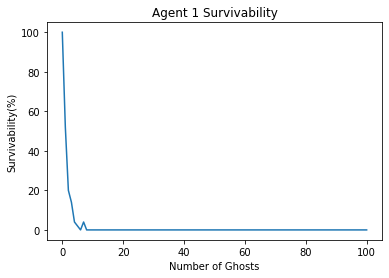

In [ ]:
#Agent 1 Simulations
ghost_survivability1 = []
maze_size = 51
for i in range(101):
  ghosts_count = i
  maze_status=False
  while(not maze_status):
    m = Maze(maze_size, ghosts_count)
    maze_status= m.dfs(0, 0, maze_size-1, maze_size-1)
  survival = 0
  for j in range(50):
    agent1_survived, path = m.agent_one(0, 0, maze_size-1, maze_size-1, 1, 0)
    if agent1_survived:
      survival += 1
  ghost_survivability1.append((survival/50)*100)
print(ghost_survivability1)

# define data values
x = np.arange(101)  # X-axis points
y = np.array(ghost_survivability1)  # Y-axis points
  
plt.plot(x, y)  # Plot the chart
plt.xlabel("Number of Ghosts")  # add X-axis label
plt.ylabel("Survivability(%)")  # add Y-axis label
plt.title("Agent 1 Survivability")  # add title
plt.show()  # display

[100.0, 70.0, 76.0, 80.0, 72.0, 78.0, 68.0, 72.0, 6.0, 66.0, 56.00000000000001, 60.0, 50.0, 66.0, 57.99999999999999, 48.0, 18.0, 46.0, 44.0, 50.0, 48.0, 28.000000000000004, 38.0, 38.0, 30.0, 30.0, 6.0, 24.0, 28.000000000000004, 26.0, 22.0, 14.000000000000002, 0.0, 14.000000000000002, 28.000000000000004, 30.0, 4.0, 20.0, 6.0, 8.0, 16.0, 0.0, 14.000000000000002, 8.0, 12.0, 8.0, 2.0, 10.0, 26.0, 20.0, 4.0, 0.0, 12.0, 12.0, 2.0, 2.0, 8.0, 2.0, 4.0, 0.0, 0.0, 6.0, 2.0, 2.0, 4.0, 4.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 6.0, 0.0, 4.0, 0.0, 2.0, 0.0, 0.0, 0.0, 4.0, 2.0, 0.0, 4.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0]


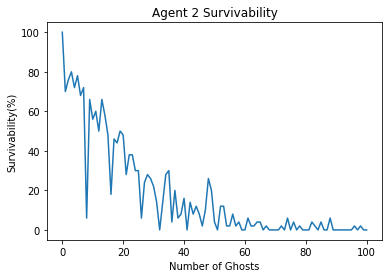

In [ ]:
#Agent 2 Simulations
ghost_survivability2 = []
maze_size = 51
for i in range(101):
  ghosts_count = i
  maze_status=False
  while(not maze_status):
    m = Maze(maze_size, ghosts_count)
    maze_status= m.dfs(0, 0, maze_size-1, maze_size-1)
  survival = 0
  for j in range(50):
    agent2_survived, path = m.agent_two(0, 0, maze_size-1, maze_size-1)
    if agent2_survived:
      survival += 1
  ghost_survivability2.append((survival/50)*100)
print(ghost_survivability2)

# define data values
x = np.arange(101)  # X-axis points
y = np.array(ghost_survivability2)  # Y-axis points
  
plt.plot(x, y)  # Plot the chart
plt.xlabel("Number of Ghosts")  # add X-axis label
plt.ylabel("Survivability(%)")  # add Y-axis label
plt.title("Agent 2 Survivability")  # add title
plt.show()  # display

[100.0, 88.0, 80.0, 75.0, 82.0, 70.0, 83.0, 74.0, 69.0, 59.0, 65.0, 57.0, 49.0, 70.0, 68.9, 47.0, 55.0, 40.0, 39.0, 45.0, 65.0, 63.0, 54.0, 50.0, 55.0, 44.0, 34.0, 37.0, 20.0, 40.0, 43.0, 31.0, 35.0, 44.0, 39.0, 41.0, 35.0, 29.0, 15.0, 19.0, 16.0, 21.0, 18.0, 10.0, 25.0, 30.0, 22.0, 15.0, 19.0, 19.0, 22.0, 22.0, 18.0, 18.0, 14.0, 17.0, 8.0, 10.0, 11.0, 20.0, 9.0, 4.0, 10.0, 5.0, 6.0, 4.0, 8.0, 4.0, 8.0, 12.0, 0.0, 5.0, 1.0, 0.0, 2.0, 6.0, 0.0, 5.0, 3.0, 1.0, 0.0, 8.0, 4.0, 8.0, 0.0, 0.0, 0.0, 2.0, 4.0, 4.0, 0.0, 2.0, 6.0, 0.0, 4.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0]


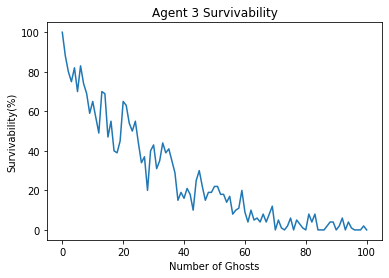

In [ ]:
#Agent 3 Simulations
ghost_survivability3 = []
maze_size = 51
for i in range(101):
  ghosts_count = i
  maze_status=False
  while(not maze_status):
    m = Maze(maze_size, ghosts_count)
    maze_status= m.dfs(0, 0, maze_size-1, maze_size-1)
  survival = 0
  for j in range(50):
    agent3_survived, path = m.agent_three(0, 0, maze_size-1, maze_size-1)
    if agent3_survived:
      survival += 1
  ghost_survivability3.append((survival/50)*100)
print(ghost_survivability3)
# define data values
x = np.arange(101)  # X-axis points
y = np.array(ghost_survivability3)  # Y-axis points
  
plt.plot(x, y)  # Plot the chart
plt.xlabel("Number of Ghosts")  # add X-axis label
plt.ylabel("Survivability(%)")  # add Y-axis label
plt.title("Agent 3 Survivability")  # add title
plt.show()  # display

[100.0, 85.0, 70.0, 81.0, 85.0, 82.0, 75.0, 70.0, 73.0, 65.0, 85.0, 89.0, 90.0, 83.0, 88.0, 75.0, 84.0, 84.0, 88.0, 72.0, 72.0, 73.0, 65.0, 68.0, 68.0, 68.0, 65.0, 63.0, 69.0, 68.0, 70.0, 71.0, 69.0, 61.0, 68.0, 65.0, 69.0, 64.0, 55.0, 49.0, 49.0, 45.0, 51.0, 49.0, 48.0, 42.0, 30.0, 29.0, 35.0, 33.0, 40.0, 37.0, 37.0, 35.0, 39.0, 30.0, 25.0, 29.0, 27.0, 18.0, 19.0, 5.0, 21.0, 18.0, 20.0, 15.0, 18.0, 23.0, 13.0, 15.0, 17.0, 4.0, 5.0, 10.0, 8.0, 15.0, 1.0, 9.0, 13.0, 2.0, 7.0, 8.0, 2.0, 3.0, 0.0, 4.0, 9.0, 1.0, 0.0, 10.0, 1.0, 5.0, 8.0, 2.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 5.0]


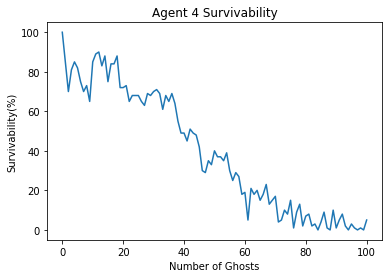

In [ ]:
#Agent 4 Simulations
ghost_survivability4 = []
maze_size = 51
for i in range(101):
  ghosts_count = i
  maze_status=False
  while(not maze_status):
    m = Maze(maze_size, ghosts_count)
    maze_status= m.dfs(0, 0, maze_size-1, maze_size-1)
  survival = 0
  for j in range(50):
    agent4_survived, path = m.agent_four(0, 0, maze_size-1, maze_size-1)
    if agent4_survived:
      survival += 1
  ghost_survivability4.append((survival/50)*100)
print(ghost_survivability4)
# define data values
x = np.arange(101)  # X-axis points
y = np.array(ghost_survivability4)  # Y-axis points
  
plt.plot(x, y)  # Plot the chart
plt.xlabel("Number of Ghosts")  # add X-axis label
plt.ylabel("Survivability(%)")  # add Y-axis label
plt.title("Agent 4 Survivability")  # add title
plt.show()  # display

[100.0, 84.0, 85.0, 79.0, 86.0, 81.0, 75.0, 73.0, 71.0, 67.0, 84.0, 89.0, 90.0, 83.0, 87.0, 74.0, 84.0, 84.0, 88.0, 72.0, 73.0, 73.0, 67.0, 68.0, 68.0, 68.0, 65.0, 62.0, 69.0, 68.0, 70.0, 71.0, 69.0, 61.0, 68.0, 65.0, 69.0, 63.0, 55.0, 55.0, 49.0, 48.0, 51.0, 49.0, 48.0, 42.0, 35.0, 31.0, 35.0, 33.0, 40.0, 37.0, 37.0, 35.0, 39.0, 30.0, 27.0, 29.0, 27.0, 19.0, 19.0, 15.0, 24.0, 18.0, 21.0, 17.0, 20.0, 23.0, 20.0, 18.0, 15.0, 10.0, 9.0, 10.0, 8.0, 15.0, 1.0, 9.0, 13.0, 2.0, 7.0, 8.0, 2.0, 3.0, 0.0, 4.0, 9.0, 1.0, 0.0, 10.0, 1.0, 5.0, 8.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 5.0]


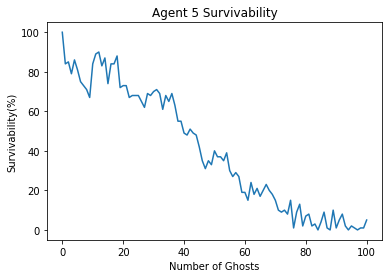

In [ ]:
#Agent 5 Simulations
ghost_survivability5 = []
maze_size = 51
for i in range(101):
  ghosts_count = i
  maze_status=False
  while(not maze_status):
    m = Maze(maze_size, ghosts_count)
    maze_status= m.dfs(0, 0, maze_size-1, maze_size-1)
  survival = 0
  for j in range(50):
    agent5_survived, path = m.agent_five(0, 0, maze_size-1, maze_size-1)
    if agent5_survived:
      survival += 1
  ghost_survivability5.append((survival/50)*100)
print(ghost_survivability5)
# define data values
x = np.arange(101)  # X-axis points
y = np.array(ghost_survivability5)  # Y-axis points
  
plt.plot(x, y)  # Plot the chart
plt.xlabel("Number of Ghosts")  # add X-axis label
plt.ylabel("Survivability(%)")  # add Y-axis label
plt.title("Agent 5 Survivability")  # add title
plt.show()  # display

Comparing agent 1, 2 and 3

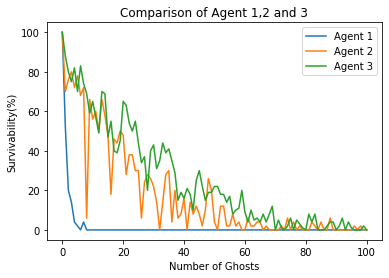

In [ ]:
plt.plot(x,ghost_survivability1, label = "Agent 1")
plt.plot(x,ghost_survivability2, label = "Agent 2")
plt.plot(x, ghost_survivability3, label = "Agent 3")
plt.xlabel("Number of Ghosts")  # add X-axis label
plt.ylabel("Survivability(%)")  # add Y-axis label
plt.title("Comparison of Agent 1,2 and 3")  # add title
plt.legend()
plt.show()

Comparing Agent 3 and 4

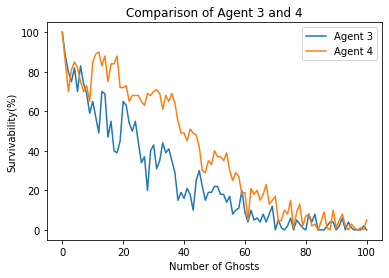

In [ ]:
plt.plot(x,ghost_survivability3, label = "Agent 3")
plt.plot(x, ghost_survivability4, label = "Agent 4")
plt.xlabel("Number of Ghosts")  # add X-axis label
plt.ylabel("Survivability(%)")  # add Y-axis label
plt.title("Comparison of Agent 3 and 4")  # add title
plt.legend()
plt.show()

Comparing Agent 4 and 5

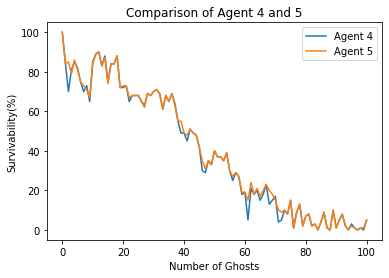

In [ ]:
plt.plot(x,ghost_survivability4, label = "Agent 4")
plt.plot(x, ghost_survivability5, label = "Agent 5")
plt.xlabel("Number of Ghosts")  # add X-axis label
plt.ylabel("Survivability(%)")  # add Y-axis label
plt.title("Comparison of Agent 4 and 5")  # add title
plt.legend()
plt.show()